In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use('bmh')

In [4]:
from datetime import datetime

In [6]:
from IPython.display import HTML, display

CSS = """
@import url("https://fonts.googleapis.com/css?family=Fira Code");

.container {
    width: 97% !important;
    font-size: 100%;
}

span {
    font-family: 'Fira Code'; color: black;
}

div.output_area pre {
    font-family: 'Fira Code'; font-size:100%; color:blue;
}

table.dataframe {
    border-collapse: collapse;
    border: none;
}
table.dataframe tr {
    border: none;
}
table.dataframe td, table.dataframe th {
    margin: 0;
    border: 2px solid #ccf;
    background-color: #f4f4ff;
    padding-left: 0.25em;
    padding-right: 0.25em;
}
table.dataframe th: not(:empty) {
    border: 2px solid #ccf;
    background-color: #f4f4ff;
    text-align: center;
    font-weight: normal;   
}
table.dataframe tr:nth-child(2) th empty {
    border-left: none;
    border-right: 2px dashed #888;
}
table.dataframe td {
    border: 2px solid #ccf;
    background-color: #f4f4ff;
}
"""

HTML(f'<style>{CSS}</style>')

In [7]:
start_date, end_date = '2010-01-01', '2021-01-01'

product_list = ['television', 'book', 'hoodie', 'sandals', 'kale chips', 'rug', 'cutlery set', 'mouse pad', 'toy train', 'gravel']

location_list = ['DE', 'CT', 'NY', 'NJ']
location_prob = [.18, .23, .25, .34]

employee_list = ['Sam', 'Leslie', 'Jes', 'Pat', 'Jo']
employee_prob = [.3, .3, .05, .2, .15]

In [8]:
current_date = datetime.now()
print(current_date)

2024-10-08 20:58:47.300824


In [9]:
N = 37_200

In [10]:
np.random.RandomState(seed=7)

df = pd.DataFrame.from_dict(
    {
        'trans_date': np.random.choice(np.arange(start_date, end_date, dtype='datetime64[D]'), size=N),
        'location': np.random.choice(location_list, size=(N,), p=location_prob),
        'employee': np.random.choice(employee_list, size=(N,), p=employee_prob),
        'product': np.random.choice(product_list, size=(N,),),    
        'sales_hrs': np.random.choice(np.arange(1, 25, 1), size=N),
        'sales_tot': np.random.normal(loc=100, scale=2, size=N)
    }
)

df['doc_date'] = current_date.strftime("%Y-%m-%d %H:%M:%S")
df['actuals'] = np.where(df['trans_date'] <= current_date, True, False)
df.loc[df['trans_date'].dt.year == 2015, ['sales_tot']] = df['sales_tot'] * .82
df.loc[(df['employee'] == 'Jes') & (df['trans_date'].between("2012-01-01", "2014-06-01")), ['sales_hrs']] = 0
df.dropna(axis=0, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37200 entries, 0 to 37199
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype        
---  ------      --------------  -----        
 0   trans_date  37200 non-null  datetime64[s]
 1   location    37200 non-null  object       
 2   employee    37200 non-null  object       
 3   product     37200 non-null  object       
 4   sales_hrs   37200 non-null  int64        
 5   sales_tot   37200 non-null  float64      
 6   doc_date    37200 non-null  object       
 7   actuals     37200 non-null  bool         
dtypes: bool(1), datetime64[s](1), float64(1), int64(1), object(4)
memory usage: 2.0+ MB


In [12]:
df.head()

,trans_date,location,employee,product,sales_hrs,sales_tot,doc_date,actuals
0,2015-07-16,CT,Pat,mouse pad,6,82.629475,2024-10-08 20:58:47,True
1,2016-04-08,CT,Sam,television,10,97.444508,2024-10-08 20:58:47,True
2,2018-05-31,NY,Sam,television,20,101.411442,2024-10-08 20:58:47,True
3,2013-05-23,DE,Pat,sandals,12,98.903667,2024-10-08 20:58:47,True
4,2018-12-18,NJ,Leslie,rug,6,101.173186,2024-10-08 20:58:47,True


In [13]:
df.sample()

,trans_date,location,employee,product,sales_hrs,sales_tot,doc_date,actuals
14119,2019-01-21,DE,Leslie,rug,7,100.696063,2024-10-08 20:58:47,True


In [14]:
df.describe()

,trans_date,sales_hrs,sales_tot
count,37200,37200.000000,37200.000000
mean,2015-06-30 06:24:27,12.367984,98.399986
min,2010-01-01 00:00:00,0.000000,76.132630
25%,2012-09-25 00:00:00,6.000000,98.132535
50%,2015-07-03 00:00:00,12.000000,99.758573
75%,2018-04-09 00:00:00,18.000000,101.206285
max,2020-12-31 00:00:00,24.000000,107.577075
std,NaN,7.005840,5.498826


In [15]:
df['actuals'].value_counts(dropna=False)

actuals
True    37200
Name: count, dtype: int64

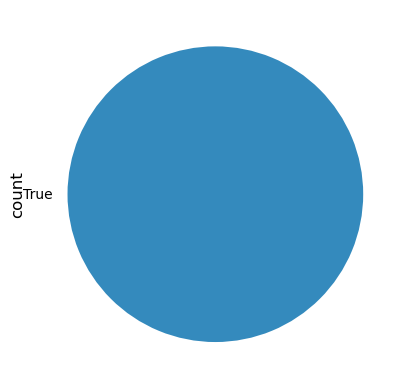

In [16]:
df['actuals'].value_counts(dropna=False).plot.pie();

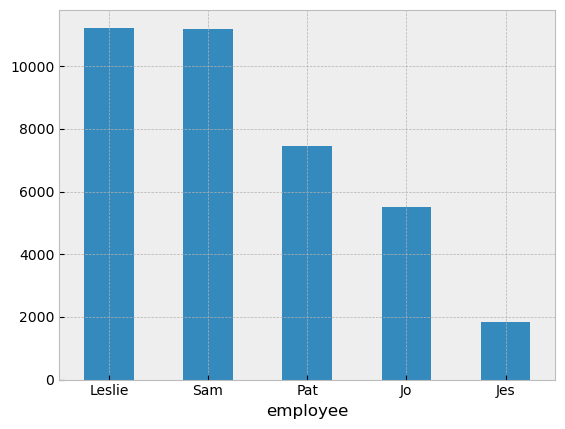

In [17]:
df['employee'].value_counts(dropna=False).plot.bar(rot=0);

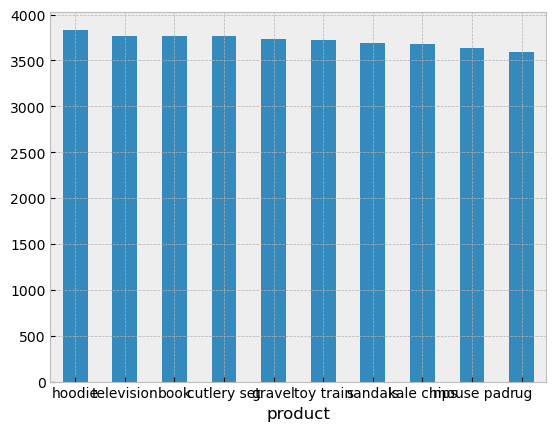

In [18]:
df['product'].value_counts(dropna=False).plot.bar(rot=0);

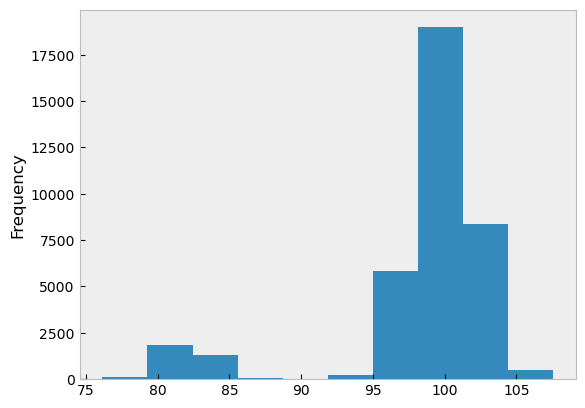

In [19]:
df['sales_tot'].plot.hist(grid=False);

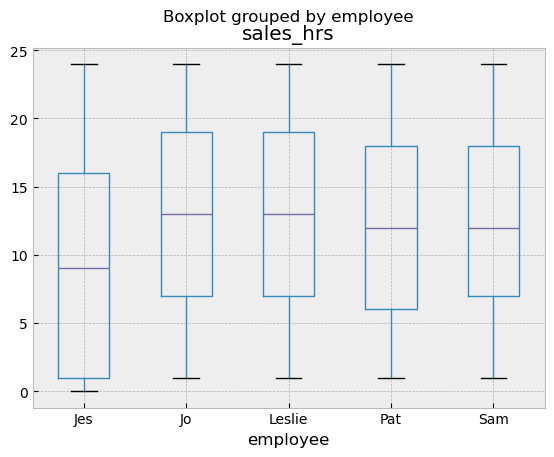

In [20]:
df.boxplot(column='sales_hrs', by='employee');

In [23]:
df.groupby('trans_date').sum(numeric_only=True)

,sales_hrs,sales_tot,actuals
trans_date,,,
2010-01-01,175,1299.398565,13
2010-01-02,126,907.998796,9
2010-01-03,162,1197.030876,12
2010-01-04,181,1504.084708,15
2010-01-05,93,804.476118,8
...,...,...,...
2020-12-27,108,696.096373,7
2020-12-28,148,1086.147521,11
2020-12-29,56,598.043951,6


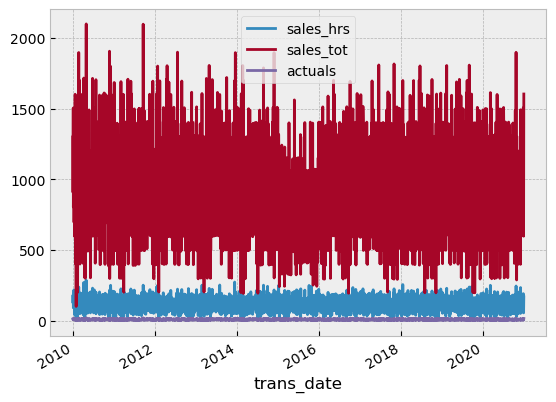

In [24]:
df.groupby('trans_date').sum().plot();

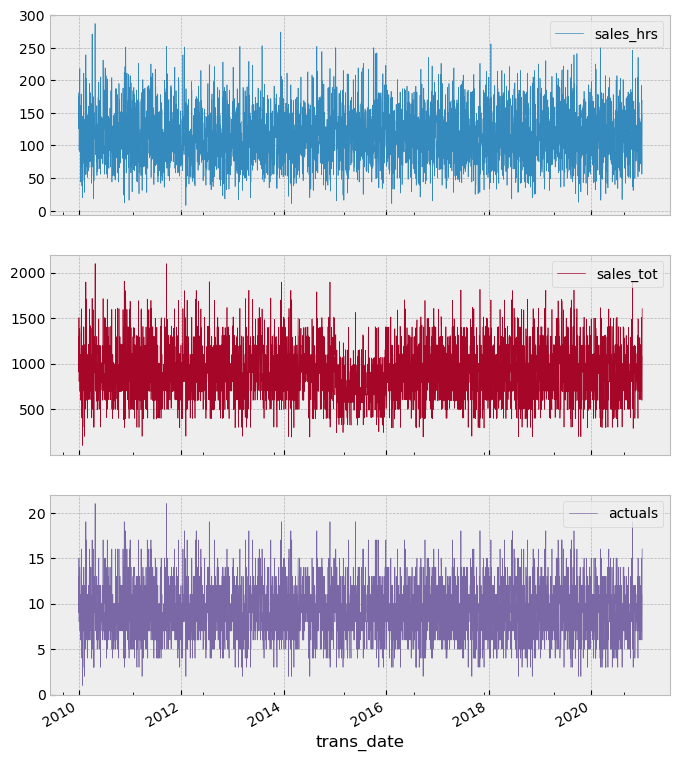

In [25]:
df.groupby('trans_date').sum().plot(subplots=True, figsize=(8,10), lw=.5);

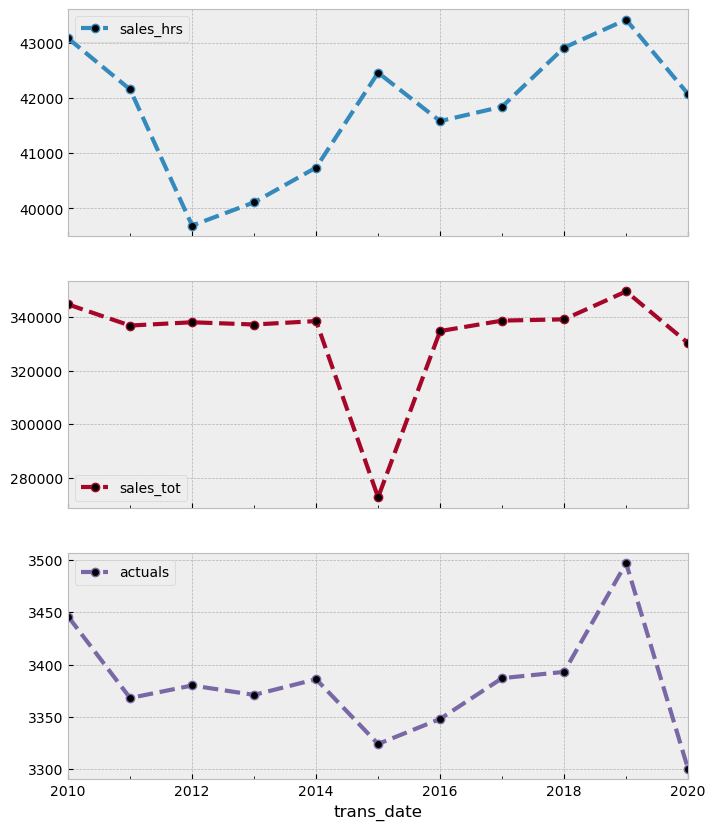

In [27]:
df.groupby(pd.Grouper(key='trans_date', freq='YE')).sum()\
.plot(subplots=True, marker='o', markerfacecolor='k', lw=3, ls='--', figsize=(8,10));

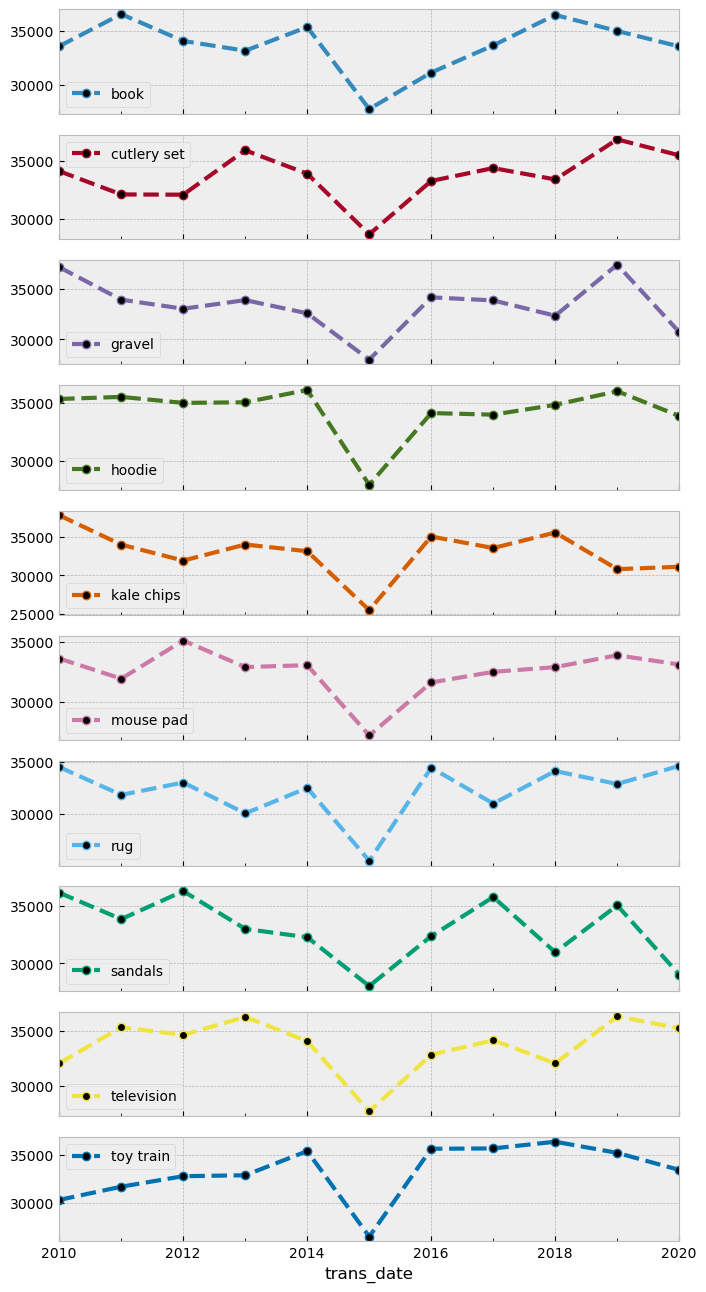

In [28]:
df.groupby([pd.Grouper(key='trans_date', freq='YE'), 'product'])['sales_tot'].sum().unstack('product')\
.plot(subplots=True, marker='o', markerfacecolor='k', lw=3, ls='--', figsize=(8,16));